# Pretrained StyleGAN

This notebook is based on the official implementation of StyleGAN by Tero Kerras, Samuli Laine, and Timo Aila of NVIDIA. You can check their implementation on this link: http://stylegan.xyz/code

Let's start!

In [4]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config
import matplotlib.pyplot as plt

This function will initialize Tensorflow.

In [5]:
tflib.init_tf()

## Loading pretrained model

We will now download the pretrained model from Google Drive. It will then be separated into different variables.

In [6]:
url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

# Print network details.
Gs.print_layers()


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656 

## Initializing vector

We will now initialize a random vector (latent vector) which will serve as an input to the Generator model.

In [7]:
rnd = np.random.RandomState(0)
latents = rnd.randn(1, Gs.input_shape[1])

## Generating image

In [8]:
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

In [9]:
images.shape

(1, 1024, 1024, 3)

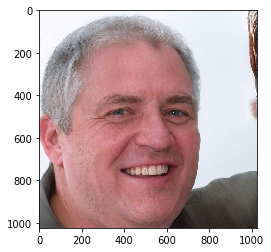

In [10]:
plt.imshow(images[0])